<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-–-Energy-Systems-Course-at-University-of-Calgary" data-toc-modified-id="Machine-Learning-–-Energy-Systems-Course-at-University-of-Calgary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Machine Learning – Energy Systems Course at University of Calgary</a></span></li><li><span><a href="#Ensemble-Learning-and-Random-Forests" data-toc-modified-id="Ensemble-Learning-and-Random-Forests-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ensemble Learning and Random Forests</a></span><ul class="toc-item"><li><span><a href="#Hard-and-Soft-Voting" data-toc-modified-id="Hard-and-Soft-Voting-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Hard and Soft Voting</a></span></li></ul></li><li><span><a href="#Bootstraping" data-toc-modified-id="Bootstraping-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bootstraping</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Boosting</a></span><ul class="toc-item"><li><span><a href="#Adaptive-Boosting" data-toc-modified-id="Adaptive-Boosting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Adaptive Boosting</a></span><ul class="toc-item"><li><span><a href="#SVM" data-toc-modified-id="SVM-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Decision Tree</a></span></li></ul></li><li><span><a href="#Gradient-Boosting-(for-Regression)" data-toc-modified-id="Gradient-Boosting-(for-Regression)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Gradient Boosting (for Regression)</a></span><ul class="toc-item"><li><span><a href="#Gradient-Boosting-with-Decision-Tree" data-toc-modified-id="Gradient-Boosting-with-Decision-Tree-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Gradient Boosting with Decision Tree</a></span></li></ul></li></ul></li><li><span><a href="#Random-Forest-for-Regression" data-toc-modified-id="Random-Forest-for-Regression-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Random Forest for Regression</a></span></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Stacking</a></span></li><li><span><a href="#Recap-Plots" data-toc-modified-id="Recap-Plots-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Recap Plots</a></span></li></ul></div>

# Machine Learning – Energy Systems Course at University of Calgary

* Instructor: [Mehdi Rezvandehy](https://www.linkedin.com/in/mehdi-rezvandehy-ph-d-70a40b52/)

# Ensemble Learning and Random Forests

In this lecture, we talk about how to aggregate the results from a group of predictors in order to achieve higher performance. For example, if you ask a difficult question from 1000 people and then aggregate the answer (the mean, median ... of the answers), in  many cases you will get more accurate result than the answer from an expert. This technique is called Ensemble Learning. Last lecture, we discussed about Decision Tree classifier. Random Forest is also an Ensemble method: instead of training one Decision Tree classifier, a group of Decision Tree classifiers are trained, each on different random subset of data. All predictions can be aggregated by getting the most votes. For example, for a training instance, if you run Decision Tree classifier 100 times each for different random data set, you have 100 predictions; the class that receives the highest frequency amongst all class should be assigned as the predicted class for that training instance. This is how Random Forest predict a class. Although it is so simple, Random Forest is one of the most powerful Machine Learning algorithms.

## Hard and Soft Voting

If you applies several classifier including Logistic Regression, SVM, Random Forest... on the same data set and each has an accuracy of around 80%, you may simply get better results by aggregating the predictions of each classifier and predict the class that receives the most votes. This approach is called a **hard voding** classifier. You may surprisingly get higher accuracy than the best classifier by ensemble learning if all classifier are **independent** from each other. For example, Figure below shows some classifiers (Logistic Regression, SVM, Random Forest...) are applied on the same data with two classes 0 and 1. For an instance, each classifier predict a different class. However, 90% of classifier predict the instance as class 1, so the final prediction will be class 1 with 90% accuracy.

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/Fig10-1.png " alt="drawing" width="850"/>

If all classifiers can predict probability of each class (*dict_proba()* method), Scikit-Learn can predict a class with with the highest probability by averaging over all the individual classifiers. This is called **soft voting**. Higher performance can be achieved by soft voting compared with hard voting due to giving higher weight to a class with highest probability. 

The following code shows how to apply hard voting for Energy Efficiency data set for multiclass classification.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Energy Efficiency Data Set
df = pd.read_csv('./Data/Building_Heating_Load.csv',na_values=['NA','?',' '])
df_multi=df.copy()
df_reg=df.copy()
df_reg.drop(['Multi-Classes','Binary Classes'], axis=1, inplace=True)
df_multi.drop(['Heating Load','Binary Classes'], axis=1, inplace=True)

ordinal_encoder = OrdinalEncoder()
Multi_Classes_encoded = ordinal_encoder.fit_transform(df_multi[['Multi-Classes']])
Multi_Classes_encoded[0:5]
df_multi['Multi-Classes']=Multi_Classes_encoded

# Shuffle
np.random.seed(32) 
df_multi=df_multi.reindex(np.random.permutation(df_multi.index))
df_multi.reset_index(inplace=True, drop=True)

df_reg=df_reg.reindex(np.random.permutation(df_reg.index))
df_reg.reset_index(inplace=True, drop=True)

# Training and Test
spt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in spt.split(df_multi, df_multi['Multi-Classes']):
    train_set_strat = df_multi.loc[train_idx]
    test_set_strat  = df_multi.loc[test_idx]  
    #
    train_set_strat_reg = df_reg.loc[train_idx]
    test_set_strat_reg  = df_reg.loc[test_idx]      
    
# Note that drop() creates a copy and does not affect train_set_strat
X_train = train_set_strat.drop("Multi-Classes", axis=1)
y_train = train_set_strat["Multi-Classes"].values  
#
X_test = test_set_strat.drop("Multi-Classes", axis=1)
y_test = test_set_strat["Multi-Classes"].values  

# Note that drop() creates a copy and does not affect train_set_strat
X_train_reg = train_set_strat_reg.drop("Heating Load", axis=1)
y_train_reg = train_set_strat_reg["Heating Load"].values  
#
X_test_reg = test_set_strat_reg.drop("Heating Load", axis=1)
y_test_reg = test_set_strat_reg["Heating Load"].values  


# Standardization training
scaler = StandardScaler()
X_train_Std=scaler.fit_transform(X_train)
X_train_reg_Std=scaler.fit_transform(X_train_reg)

# Standardization test
X_test_Std=scaler.fit_transform(X_test)
X_test_reg_Std=scaler.fit_transform(X_test_reg)

Logistic Regression, Random Forest, SVM are applied and then the results are aggregated:

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=10)
rnd = RandomForestClassifier(random_state=10)
svm = SVC(C=10)
hard_voting = VotingClassifier(estimators=[('lr', log), ('rf', rnd), ('svc', svm)],voting='hard')
hard_voting.fit(X_train_Std, y_train)

clf=['Logistic Regression:', 'Random Forest:', 'SVM:', 'Hard Voting:']
i=0
for clfier in (log, rnd, svm, hard_voting):
    clfier.fit(X_train_Std, y_train)
    y_pred = clfier.predict(X_test_Std)
    print(clf[i], accuracy_score(y_test, y_pred))
    i+=1

Logistic Regression: 0.8051948051948052
Random Forest: 0.9090909090909091
SVM: 0.922077922077922
Hard Voting: 0.9285714285714286


As you can see, for this data set, hard voting gives a little higher performance than the individual classifiers for test set. 

To apply soft voting, you need to change voting='soft' and For Support Vector Machine (SVC), you need to set its probability hyperparameter to True.

In [3]:
log = LogisticRegression(random_state=10)
rnd = RandomForestClassifier(random_state=10)
svm = SVC(C=10,probability=True)
soft_voting = VotingClassifier(estimators=[('lr', log), ('rf', rnd), ('svc', svm)],voting='soft')
soft_voting.fit(X_train_Std, y_train)

clf=['Logistic Regression:', 'Random Forest:', 'SVM:', 'Soft Voting:']
i=0
for clfier in (log, rnd, svm, soft_voting):
    clfier.fit(X_train_Std, y_train)
    y_pred = clfier.predict(X_test_Std)
    print(clf[i], accuracy_score(y_test, y_pred))
    i+=1

Logistic Regression: 0.8051948051948052
Random Forest: 0.9090909090909091
SVM: 0.922077922077922
Soft Voting: 0.935064935064935


Soft voting works better than hard voting giving higher performance than the individual classifiers. You should always try aggregating some promising algorithms to see if the performance can be increased or not. The more diverse and independent the prediction, the higher performance should be achieved. The problem is how to get many diverse prediction??

# Bootstraping

As we discussed, independent prediction can be achieved by using different classifiers. Another approach to get diverse prediction is to use the same training algorithm for every
predictor, but training is applied on different random subsets of data. When we the sampling is applied with replacement, it is called **bootstraping or bagging**. When replacement is not performed, it is called **pasting**. Figure below shows an example of bootstraping, the same predictor (Descision Tree) is applied for many samples (say 100) from data. This leads to achieve many independent predictions. Then, ensemble learning (hard or soft voting) can be applied to aggregate the predictions. 

Bagging and pasting can be applied by Scikit-Learn's BaggingClassifier class. The following code shows training of 200 Decision Tree classifiers, each trained on 100 training instances randomly sampled from the training set with replacement. Finally, BaggingClassifier automatically applies soft voting to aggregate predictions. You can apply pasting instead by just setting *bootstrap=False*.

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=200,
                            max_samples=100, bootstrap=True, n_jobs=-1)
bagging.fit(X_train_Std, y_train)
y_pred = bagging.predict(X_test_Std)

The following code show the decision boundary of a single Decision Tree on left and bootstraping ensemble of 500 trees from the code above (bagging) on the right. Both models are trained on the same data set. both trained on the moons dataset. It is clear that the ensemble’s predictions generalize (right) much better than the single Decision Tree’s predictions.

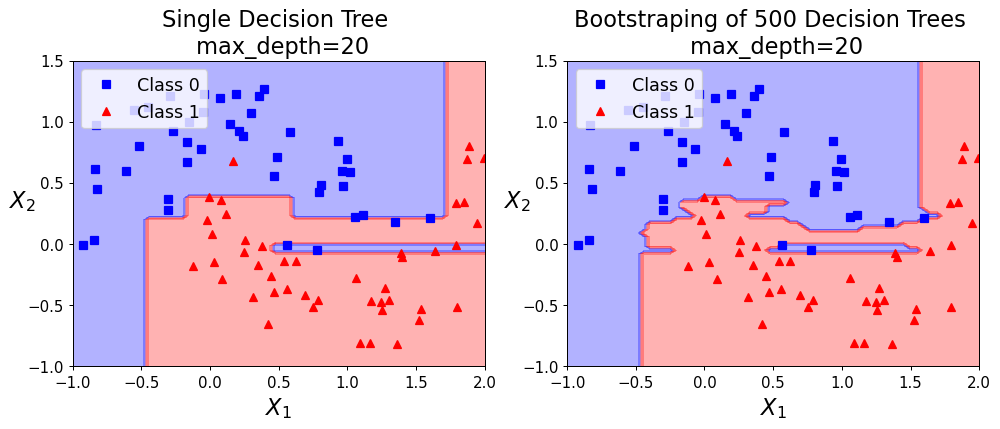

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import random
from sklearn.datasets import make_moons
  
#
font = {'size'   : 12}
plt.rc('font', **font)
fig = plt.subplots(figsize=(13.0, 4.5), dpi= 90, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1) 
X, y = make_moons(n_samples=100, noise=0.23, random_state=10)

x1s = np.linspace(-1.8,3, 100)
x2s = np.linspace(-1.5,2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
np.random.seed(42) 
tree_clf = DecisionTreeClassifier(max_depth=8)
tree_clf.fit(X, y)
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['b','r'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", label="Class 1")
    
plt.axis([-1.0, 2.0, -1.0, 1.5])
plt.xlabel(r"$X_{1}$", fontsize=18)
plt.ylabel(r"$X_{2}$", fontsize=18, rotation=0)
plt.title("Single Decision Tree \n max_depth=20", fontsize=18)
plt.legend(loc=2, fontsize=14)

ax2=plt.subplot(1,2,2) 

# Decision Trees
np.random.seed(42) 

bagging = BaggingClassifier(tree_clf, n_estimators=500, bootstrap=True, n_jobs=-1)
bagging.fit(X, y)
y_pred = bagging.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['b','r'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Class 0")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", label="Class 1")
    
plt.axis([-1.0, 2.0, -1.0, 1.5])
plt.xlabel(r"$X_{1}$", fontsize=18)
plt.ylabel(r"$X_{2}$", fontsize=18, rotation=0)
plt.title("Bootstraping of 500 Decision Trees \n max_depth=20", fontsize=18)
plt.legend(loc=2, fontsize=14)

plt.show()

# Random Forest

Random Forest is an ensemble of Decision Trees, so the bagging method with Decision Trees described before works the same as Random Forest. Instead of using a BaggingClassifier, Scikit learn's RandomForestClassifier class is more straightforward to apply. The following code trains a Random Forest classifier:

In [6]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators=500, max_samples=8, n_jobs=-1)
rnd.fit(X_train_Std, y_train)
y_pred = rnd.predict(X_test_Std)

# Feature Importance

Another important application random forest is to measure the importance of each feature. A feature importance in Scikit-Learn is measured by calculating how much impurity is reduced on average by including that feature.

Lets calculate the importance of features for Energy efficiency data set.

In [7]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators=500, max_depth=8, n_jobs=-1)
rnd.fit(X_train_Std, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, n_jobs=-1)

In [8]:
Accuracies=cross_val_score(rnd,X_train_Std,y_train, cv=4, scoring="accuracy")
np.mean(Accuracies)

0.96741575418046

In [9]:
rnd.feature_importances_

array([0.20432577, 0.20646824, 0.12355837, 0.10627849, 0.07790368,
       0.01929514, 0.21678436, 0.04538594])

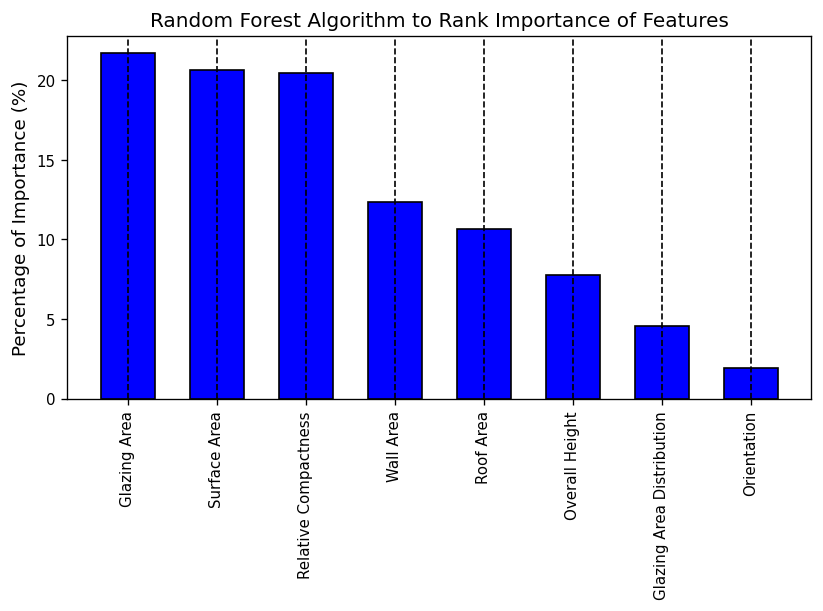

In [10]:
font = {'size'   : 9}
plt.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(8, 4), dpi= 120, facecolor='w', edgecolor='k')

score=list((rnd.feature_importances_*100))
sort_low_high=np.sort(score, axis=0)
sort_high_low=sort_low_high[::-1]
clmns=list(X_train.columns)
sort_colms=[]
for i in range(len(sort_high_low)):
    ind=score.index(sort_high_low[i])
    sort_colms.append(clmns[ind])
index = np.arange(len(sort_high_low))
ax1.bar(index, sort_high_low, align='center',width=0.6, alpha=1, ecolor='black',edgecolor ='k', capsize=4,color='b')
#ax1.set_xlabel('Features',fontsize=12)
ax1.set_ylabel('Percentage of Importance (%)',fontsize=11)
ax1.set_xticks(np.arange(len(sort_colms)))
ax1.set_xticklabels(sort_colms, rotation=90)     
ax1.xaxis.grid(color='k', linestyle='--', linewidth=1) 
plt.title('Random Forest Algorithm to Rank Importance of Features',fontsize=12)
plt.show()    

# Boosting

Boosting is another ensemble learning applied to integrate some weak learners into some strong learner. Boosting methods generally work by sequentially train predictors, and for each training, it tries to improve its predecessor. The most important boosting techniques are Adaptive Boosting (AdaBoost) and Gradient Boosting.

## Adaptive Boosting 

Adaptive Boosting corrects its predictor by paying more attention to the training instances that are underfitting the predecessor. This leads to a new predictor for each run focusing on difficult instances. Adaptive Boosting requires a classifier such as SVM or Decision Trees. Then, it gives more weight to misclassified instances. This process is repeated for many times. Finally, ensemble is applied to make prediction. This usually makes the first classifier (SVM, Decision Trees...) more powerful (see Figure below).

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/Fig10-2.png " alt="drawing" width="950"/>

Lets apply Adaptive Boosting for SVM. First without Adaptive Boosting:

### SVM 

In [11]:
from sklearn.svm import LinearSVC
# SVM Classifier model
np.random.seed(32)
svm = LinearSVC(C=1)
svm.fit(X_train_Std, y_train)
Accuracies=cross_val_score(svm,X_train_Std,y_train, cv=4, scoring="accuracy")
np.mean(Accuracies)

0.7540849673202614

Then apply Adaptive Boosting:

In [12]:
from sklearn.ensemble import AdaBoostClassifier
ada_svm = AdaBoostClassifier(svm, n_estimators=100,learning_rate=0.05,algorithm="SAMME",random_state=42)
ada_svm.fit(X_train_Std,y_train)
Accuracies=cross_val_score(ada_svm,X_train_Std,y_train, cv=4, scoring="accuracy")
np.mean(Accuracies)

0.7508063831593244

After applying Adaptive Boosting, the performance has not changed for SVM. But this is not the case all the time.

### Decision Tree

Now apply for Decision Tree:

In [13]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(42) 
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train_Std, y_train)
Accuracies=cross_val_score(tree,X_train_Std,y_train, cv=4, scoring="accuracy")
np.mean(Accuracies)

0.7101158645276293

In [14]:
ada_tree = AdaBoostClassifier(tree, n_estimators=100,learning_rate=0.5,
                              algorithm="SAMME",random_state=42)
ada_tree.fit(X_train_Std,y_train)
Accuracies=cross_val_score(ada_tree,X_train_Std,y_train, cv=4, scoring="accuracy")
np.mean(Accuracies)

0.9152448858331211

Wow! applying Adaptive Boosting has greatly improved the performance.

## Gradient Boosting (for Regression)

Gradient Boosting is another popular Boosting algorithm. Similar to Adaptive Boosting, Gradient Boosting corrects its predecessor and then ensemble is applied at the end. The only difference is Gradient Boosting fits new predictor to the residual errors from the previous predictor (Adaptive Boosting tweaks the instance weights at every iteration).

Let’s apply Gradient Boosting for a simple regression example using Decision Trees as the base predictors. **Gradient Boosting works great with regression tasks**.

First generate a synthetic data and a Decision Tree is trained based on the synthetic training data:

### Gradient Boosting with Decision Tree

In [15]:
# Quadratic training set + noise
np.random.seed(52)
n = 100
X = np.random.rand(n, 1)
y =  10-(X-0.5) **2
y = y + np.random.randn(n, 1) / 15

In [16]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42) 
tree_1 = DecisionTreeRegressor(max_depth=3,min_samples_split=20)
tree_1.fit(X, y)

DecisionTreeRegressor(max_depth=3, min_samples_split=20)

Now residual errors between true values and the first predictor is calculated. Then, a second DecisionTreeRegressor is trained:

In [17]:
Error_1=[y[i]-tree_1.predict(X[i].reshape(-1,1)) for i in range(len(X))]
tree_2 = DecisionTreeRegressor(max_depth=3,min_samples_split=20)
tree_2.fit(X, Error_1)

DecisionTreeRegressor(max_depth=3, min_samples_split=20)

Again a third regressor is trained on the residual errors made by the second predictor:

In [18]:
Error_2=[Error_1[i]-tree_2.predict(X[i].reshape(-1,1)) for i in range(len(X))]
tree_3 = DecisionTreeRegressor(max_depth=3,min_samples_split=20)
tree_3.fit(X, Error_2)

DecisionTreeRegressor(max_depth=3, min_samples_split=20)

Then again a forth regressor on the residual errors made by the third predictor is trained:

In [19]:
Error_3=[Error_2[i]-tree_3.predict(X[i].reshape(-1,1)) for i in range(len(X))]
tree_4 = DecisionTreeRegressor(max_depth=3,min_samples_split=20)
tree_4.fit(X, Error_3)

DecisionTreeRegressor(max_depth=3, min_samples_split=20)

This process can be repeated for many iteration.

Now we have an ensemble containing four trees. It can make predictions on a new
instance simply by adding up the predictions of all the trees. The following code predicts 5 instances of the training set.

In [20]:
X_new=X[:5]
y_pred = sum(tree.predict(X_new) for tree in (tree_1, tree_2, tree_3, tree_4))
y_pred

array([ 9.92963596,  9.76641516, 10.01292979,  9.98829197,  9.81755547])

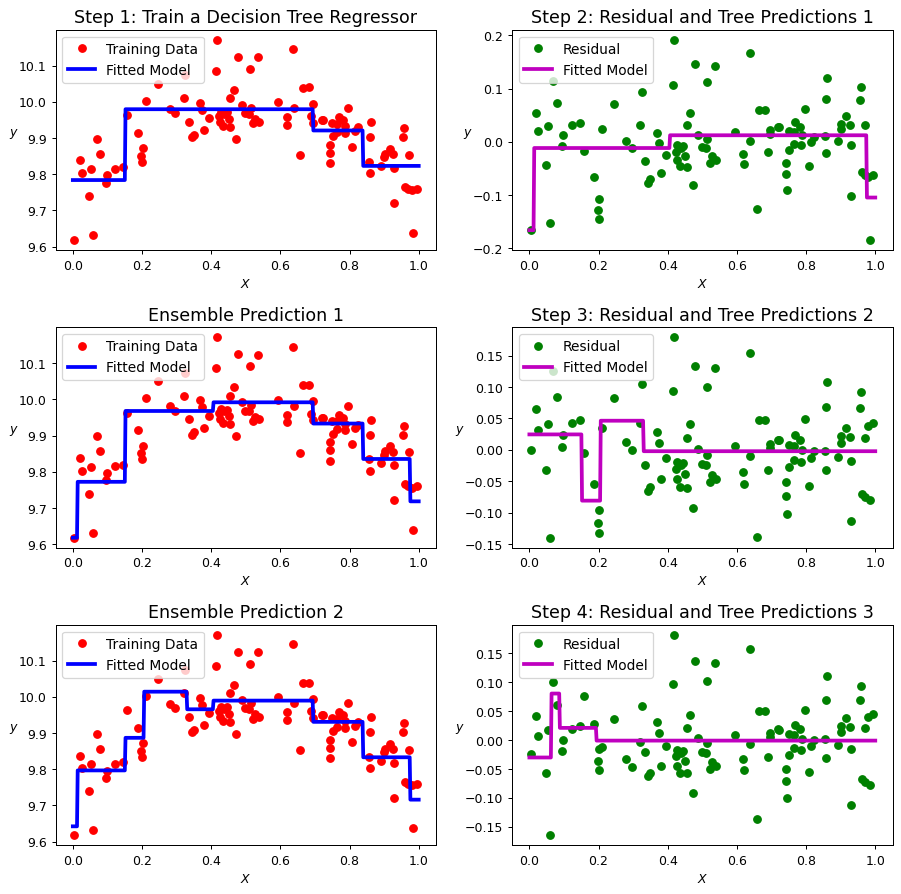

In [21]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib
import pylab as plt

font = {'size'   : 10}
matplotlib.rc('font', **font)
fig,ax = plt.subplots(figsize=(12, 12), dpi= 90, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.35, wspace=0.2)

ax1=plt.subplot(3,2,1) 
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_1.predict(x1)

plt.xlabel("$X$",)
plt.ylabel("$y$", rotation=0)
plt.plot(X, y, "ro",markersize=6,label='Training Data')
plt.plot(x1, y_pred, "b-", linewidth=3, label='Fitted Model')
plt.title("Step 1: Train a Decision Tree Regressor", fontsize=14)
plt.legend(loc=2, fontsize=11)

ax2=plt.subplot(3,2,2) 
x1 = np.linspace(0, 1, 500).reshape(-1, 1)

y_pred = tree_2.predict(x1)

plt.xlabel("$X$")
plt.ylabel("$y$", rotation=0)
plt.plot(X, Error_1, "go",markersize=6,label='Residual')
plt.plot(x1, y_pred, "m-", linewidth=3, label='Fitted Model')
plt.legend(loc=2, fontsize=11)
plt.title("Step 2: Residual and Tree Predictions 1", fontsize=14)

ax3=plt.subplot(3,2,3) 

y_pred = sum(tree.predict(x1) for tree in (tree_1, tree_2))

plt.xlabel("$X$")
plt.ylabel("$y$", rotation=0)
plt.plot(X, y, "ro",markersize=6,label='Training Data')
plt.plot(x1, y_pred, "b-", linewidth=3, label='Fitted Model')
plt.legend(loc=2, fontsize=11)
plt.title("Ensemble Prediction 1", fontsize=14)

ax4=plt.subplot(3,2,4) 

y_pred = tree_3.predict(x1)

plt.xlabel("$X$")
plt.ylabel("$y$", rotation=0)
plt.plot(X, Error_2, "go",markersize=6,label='Residual')
plt.plot(x1, y_pred, "m-", linewidth=3, label='Fitted Model')
plt.legend(loc=2, fontsize=11)
plt.title("Step 3: Residual and Tree Predictions 2", fontsize=14)

ax5=plt.subplot(3,2,5) 

y_pred = sum(tree.predict(x1) for tree in (tree_1, tree_2, tree_3))

plt.xlabel("$X$")
plt.ylabel("$y$", rotation=0)
plt.plot(X, y, "ro",markersize=6,label='Training Data')
plt.plot(x1, y_pred, "b-", linewidth=3, label='Fitted Model')
plt.legend(loc=2, fontsize=11)
plt.title("Ensemble Prediction 2", fontsize=14)


ax4=plt.subplot(3,2,6) 

y_pred = tree_4.predict(x1)

plt.xlabel("$X$")
plt.ylabel("$y$", rotation=0)
plt.plot(X, Error_3, "go",markersize=6,label='Residual')
plt.plot(x1, y_pred, "m-", linewidth=3, label='Fitted Model')
plt.legend(loc=2, fontsize=11)
plt.title("Step 4: Residual and Tree Predictions 3", fontsize=14)

plt.show()

If this process is repeated many times it may leads to overfitting. All this process can be automatically applied by Scikit-Learn’s XGBoost. You should first install it by typing *pip install xgboost* in Anaconda Prompt and press enter. 

In [22]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

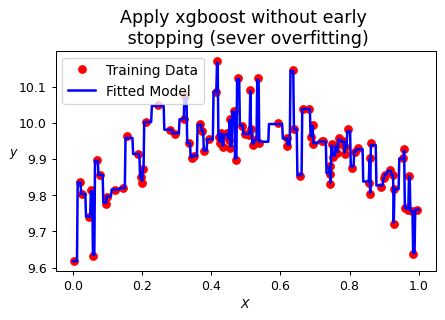

In [23]:
font = {'size'   : 10}
matplotlib.rc('font', **font)
fig,ax = plt.subplots(figsize=(12, 12), dpi= 90, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.35, wspace=0.2)

ax1=plt.subplot(3,2,1) 
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = xgb_reg.predict(x1)

plt.xlabel("$X$",)
plt.ylabel("$y$", rotation=0)
plt.plot(X, y, "ro",markersize=6,label='Training Data')
plt.plot(x1, y_pred, "b-", linewidth=2, label='Fitted Model')
plt.title("Apply xgboost without early \n stopping (sever overfitting)", fontsize=14)
plt.legend(loc=2, fontsize=11)
plt.show()

xgboost has early stopping (early_stopping_rounds) to avoid overfitting. As we discussed before, early stopping needs validation set. So the training set can be divided into smaller training set and validation set:

In [24]:
# Cocatenate X and y
Xy=np.concatenate((X,y),axis=1)

In [25]:
from sklearn.model_selection import train_test_split

# Split the training set to 15% varidation set and smaller traning set
Smaller_X, Validation = train_test_split(Xy, test_size=0.15, random_state=40)

In [26]:
import warnings
warnings.filterwarnings('ignore')

xgb_reg.fit(Smaller_X[:,0].reshape(-1,1), Smaller_X[:,1].reshape(-1,1),
            eval_set=[(Validation[:,0].reshape(-1,1),
                       Validation[:,1].reshape(-1,1))], early_stopping_rounds=2)

[0]	validation_0-rmse:6.59046
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:4.62540
[2]	validation_0-rmse:3.24312
[3]	validation_0-rmse:2.27088
[4]	validation_0-rmse:1.58716
[5]	validation_0-rmse:1.10653
[6]	validation_0-rmse:0.76893
[7]	validation_0-rmse:0.53221
[8]	validation_0-rmse:0.36468
[9]	validation_0-rmse:0.25645
[10]	validation_0-rmse:0.18647
[11]	validation_0-rmse:0.13789
[12]	validation_0-rmse:0.10593
[13]	validation_0-rmse:0.08436
[14]	validation_0-rmse:0.07433
[15]	validation_0-rmse:0.07003
[16]	validation_0-rmse:0.06896
[17]	validation_0-rmse:0.06654
[18]	validation_0-rmse:0.06499
[19]	validation_0-rmse:0.06455
[20]	validation_0-rmse:0.06348
[21]	validation_0-rmse:0.06345
[22]	validation_0-rmse:0.06331
[23]	validation_0-rmse:0.06369
[24]	validation_0-rmse:0.06352
Stopping. Best iteration:
[22]	validation_0-rmse:0.06331



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

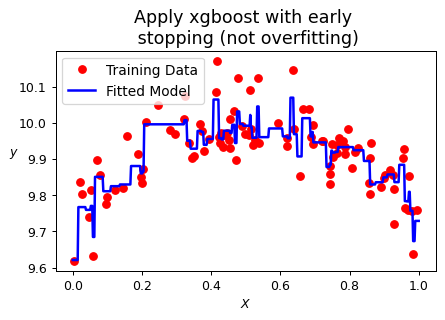

In [27]:
font = {'size'   : 10}
matplotlib.rc('font', **font)
fig,ax = plt.subplots(figsize=(12, 12), dpi= 90, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.35, wspace=0.2)

ax1=plt.subplot(3,2,1) 
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = xgb_reg.predict(x1)

plt.xlabel("$X$",)
plt.ylabel("$y$", rotation=0)
plt.plot(X, y, "ro",markersize=6,label='Training Data')
plt.plot(x1, y_pred, "b-", linewidth=2, label='Fitted Model')
plt.title("Apply xgboost with early \n stopping (not overfitting)", fontsize=14)
plt.legend(loc=2, fontsize=11)
plt.show()

# Random Forest for Regression

Random Forest can also be applied for regression task as we saw in Lecture 4. Lets apply Random Forest for the synthetic data.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict

forest_reg = RandomForestRegressor()
forest_reg.fit(X, y)
y_pred = cross_val_predict(forest_reg, X, y, cv=4)

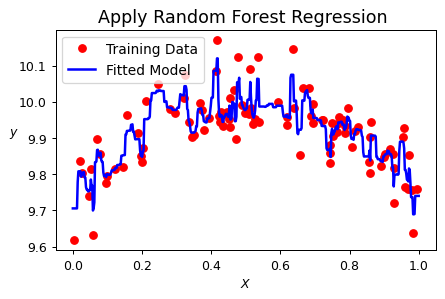

In [29]:
font = {'size'   : 10}
matplotlib.rc('font', **font)
fig,ax = plt.subplots(figsize=(12, 12), dpi= 90, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.35, wspace=0.2)

ax1=plt.subplot(3,2,1) 
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = forest_reg.predict(x1)

plt.xlabel("$X$",)
plt.ylabel("$y$", rotation=0)
plt.plot(X, y, "ro",markersize=6,label='Training Data')
plt.plot(x1, y_pred, "b-", linewidth=2, label='Fitted Model')
plt.title("Apply Random Forest Regression ", fontsize=14)
plt.legend(loc=2, fontsize=11)
plt.show()

# Stacking 

Ensemble Learning also very useful to apply **near the end of project when a few good and promising predictors are built to integrate them into an even stronger predictor**. We saw that soft and hard voting can be simply applied to aggregate predictors to reach a strong learner. Hard voting aggregates the predictions of each classifier and predict the class that gets the most votes. Soft voting works by averaging the probability of each class and predict a class with the highest probability. Soft voting often achieves higher performance than Hard voting due to giving more weight to highly confident votes. Instead of using simple functions to aggregate the predictions of all predictors, **staking approach** trains a model such as Random Forest to perform this aggregation. The final predictor takes these predictions as inputs and makes the final prediction. Staking may lead to even better prediction than the best individual if predictors are independent from each other (Géron 2019). Figure below shows an schematic illustration of staking approach.

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/Fig10-3.png " alt="drawing" width="850"/>

Lets apply stacking approach for Logistic Regression, Random Forest, Stochastic Gradient Descent and SVM. But first, look at performance of each predictor hard and soft voting on the test set.

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier

log = LogisticRegression(random_state=10)
rnd = RandomForestClassifier(random_state=10)
svm = SVC(C=10,random_state=10)
sgd = SGDClassifier(random_state=10)
dmy = DummyClassifier(random_state=42)

clf=['Dummy Classifier','Logistic Regression ', 'Random Forest ', 'SVM','SGD ', 'Hard Voting ', 'Soft Voting ']
i=0
pre_acc=[]
for clfier in (dmy,log, rnd, svm, sgd, hard_voting, soft_voting):
    clfier.fit(X_train_Std, y_train)
    y_pred = clfier.predict(X_test_Std)
    acc=accuracy_score(y_test, y_pred)
    pre_acc.append(acc)
    print(clf[i], acc)
    i+=1

Dummy Classifier 0.2857142857142857
Logistic Regression  0.8051948051948052
Random Forest  0.9090909090909091
SVM 0.922077922077922
SGD  0.7467532467532467
Hard Voting  0.9285714285714286
Soft Voting  0.935064935064935


Soft voting gives the highest accuracy. Now, we apply stacking to see if you can get higher accuracy. 

In [31]:
estimators=[log,rnd,svm,sgd]   
x_Predictions = np.zeros((len(X_train_Std), len(estimators)), dtype=np.float32)

# Apply estimators on Validation data set
for index, estimator in enumerate(estimators):
    estimator.fit(X_train_Std, y_train)
    y_pred = cross_val_predict(estimator, X_train_Std, y_train, cv=4)
    x_Predictions[:, index] = np.ravel(y_pred)

# Train a new Random Forest for prediction    
New_rnd = RandomForestClassifier()
New_rnd.fit(x_Predictions, y_train)

# Predict result by stacking on test set
x_test_predictions = np.zeros((len(X_test_Std), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
    x_test_predictions[:, index] = np.ravel(estimator.predict(X_test_Std))
    
y_pred = New_rnd.predict(x_test_predictions)
acc=accuracy_score(y_test, y_pred)

pre_acc.append(acc)

clf=clf+['stacking']
print('Stacking ', acc)

Stacking  0.9025974025974026


# Recap Plots

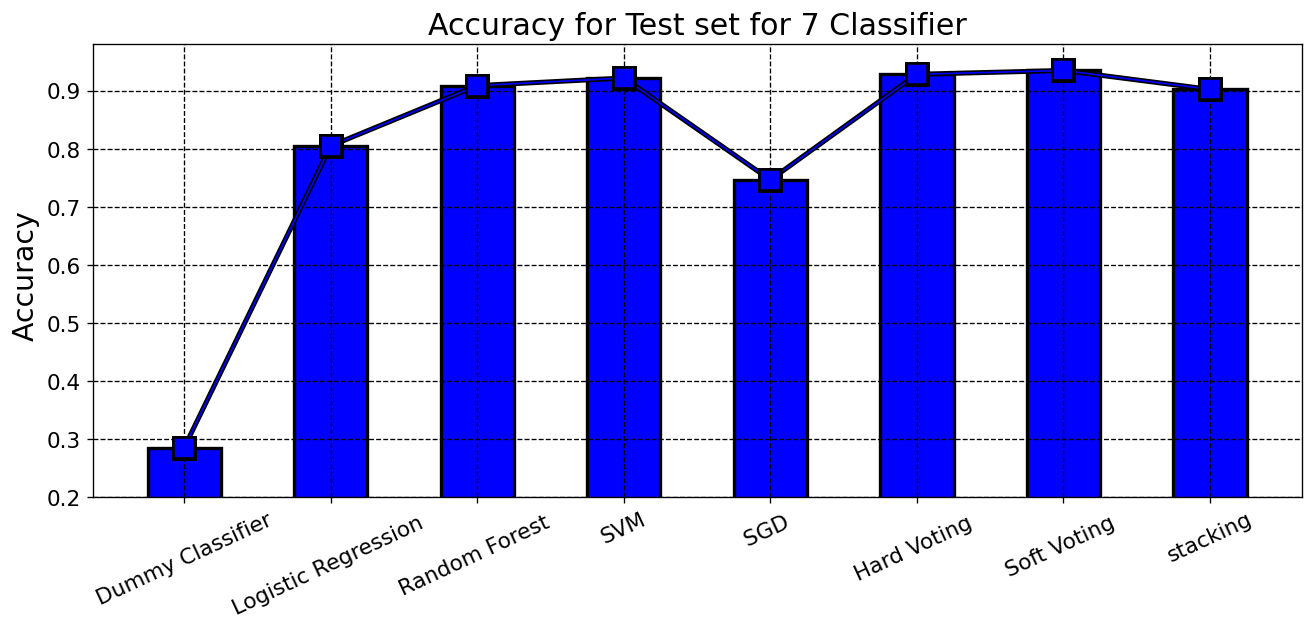

In [32]:
import matplotlib.patheffects as pe

font = {'size'   :13}
matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(13, 5), dpi= 120, facecolor='w', edgecolor='k')

plt.plot(clf,pre_acc,'bs-',linewidth=1,path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()],
                                                             markersize=12,label='Accuracy',markeredgecolor='k')
ax1.bar(clf,pre_acc,lw =2, align='center',width=0.5, alpha=1, ecolor='black', edgecolor='k',capsize=1,color='b')
plt.ylim((0.2, 0.98)) 
ax1.set_xticklabels(clf, rotation=25)     
ax1.xaxis.grid(color='k', linestyle='--', linewidth=0.8) 
ax1.yaxis.grid(color='k', linestyle='--', linewidth=0.8)
plt.ylabel('Accuracy ',fontsize='17')
plt.title('Accuracy for Test set for 7 Classifier',fontsize='18')
plt.show()